### Importing libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Reading test data of csv in Data Frame for prediction

In [2]:
df_test = pd.read_csv('test.csv')

In [3]:
df_deproberta = pd.read_csv('rafalposwiata_deproberta-large-depression.tsv', sep = '\t')

In [4]:
df_ensemble = pd.read_csv('Ensemble.tsv', sep = '\t')

In [5]:
df_roberta = pd.read_csv('rafalposwiata_roberta-large-depression.tsv', sep = '\t')

## Showing head of the Data Frames

In [9]:
# 0:not depression, 1:moderate, 2:severe
df_test.head()

,pid,text,labels
0,test_pid_1,Im scared : This is it. I lie to myself every ...,1
1,test_pid_2,New to this but just wanted to vent : I just f...,1
2,test_pid_3,I’m sad : It’s kinda always been an issue. I w...,1
3,test_pid_4,Lonely but not alone. : All of my immediately ...,1
4,test_pid_5,This year has been trash. : I dont know why I’...,1


In [10]:
df_deproberta.head()

,pid,class_label
0,test_pid_1,moderate
1,test_pid_2,moderate
2,test_pid_3,moderate
3,test_pid_4,moderate
4,test_pid_5,moderate


In [11]:
df_roberta.head()

,pid,class_label
0,test_pid_1,moderate
1,test_pid_2,moderate
2,test_pid_3,moderate
3,test_pid_4,moderate
4,test_pid_5,moderate


### Visualization of Results

In [12]:
df_test['labels'] = df_test['labels'].replace({0:'not depression', 1: 'moderate', 2: 'severe'})

In [13]:
df_test.head()

,pid,text,labels
0,test_pid_1,Im scared : This is it. I lie to myself every ...,moderate
1,test_pid_2,New to this but just wanted to vent : I just f...,moderate
2,test_pid_3,I’m sad : It’s kinda always been an issue. I w...,moderate
3,test_pid_4,Lonely but not alone. : All of my immediately ...,moderate
4,test_pid_5,This year has been trash. : I dont know why I’...,moderate


Text(0.5, 0.98, 'Original data')

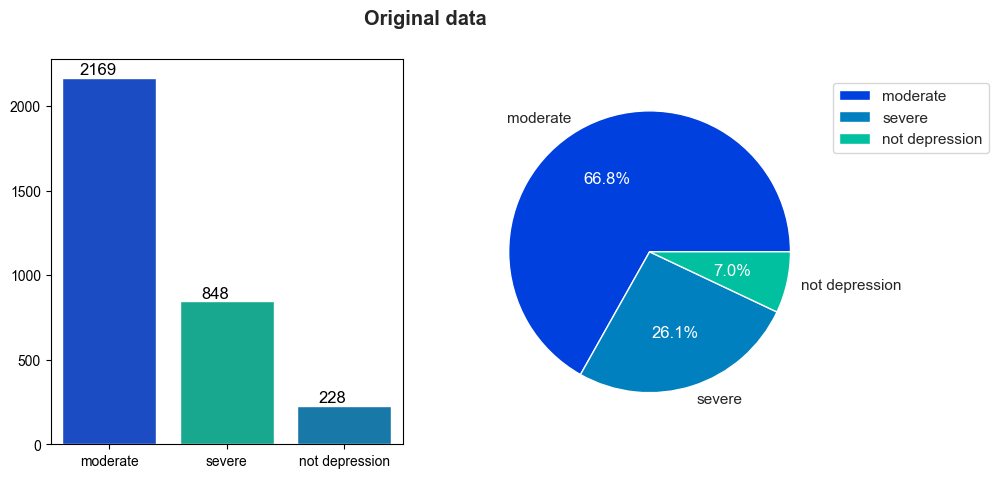

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x=df_test['labels'].value_counts().index
y=df_test['labels'].value_counts().values.tolist()
data = df_test.groupby("labels").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("winter", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_test['labels'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Original data',weight = 'bold')

Text(0.5, 0.98, 'Results on Ensemble')

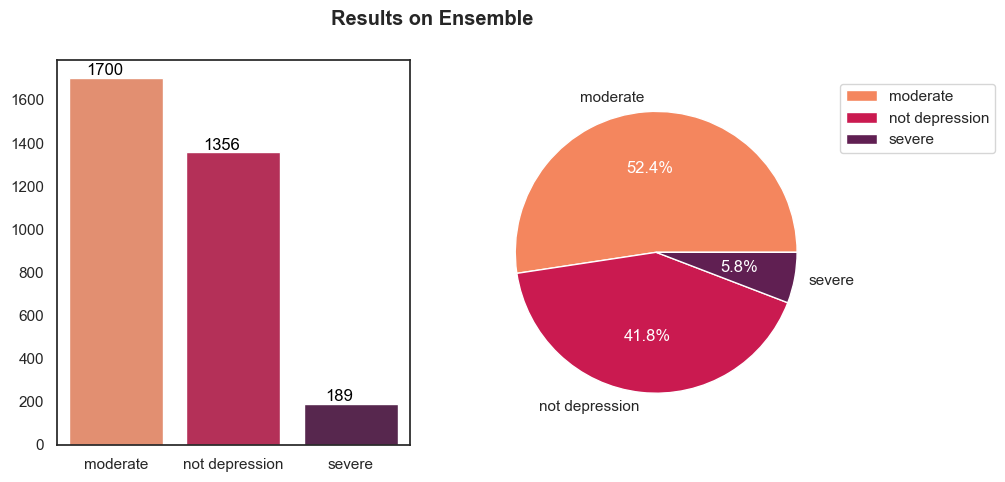

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x=df_ensemble['class_label'].value_counts().index
y=df_ensemble['class_label'].value_counts().values.tolist()
data = df_ensemble.groupby("class_label").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("rocket_r", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_ensemble['class_label'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Results on Ensemble',weight = 'bold')

Text(0.5, 0.98, 'Results on Roberta')

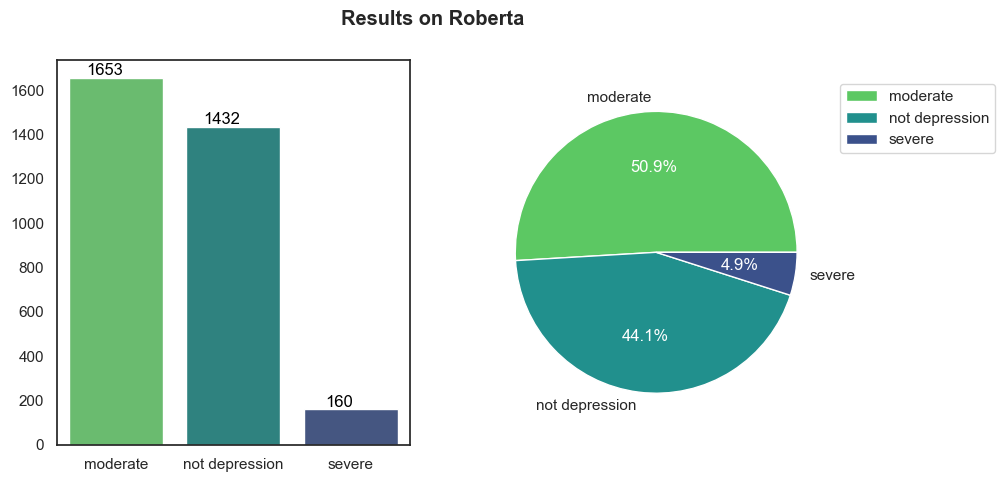

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x=df_roberta['class_label'].value_counts().index
y=df_roberta['class_label'].value_counts().values.tolist()
data = df_roberta.groupby("class_label").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("viridis_r", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_roberta['class_label'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Results on Roberta',weight = 'bold')

Text(0.5, 0.98, 'Results on Deproberta')

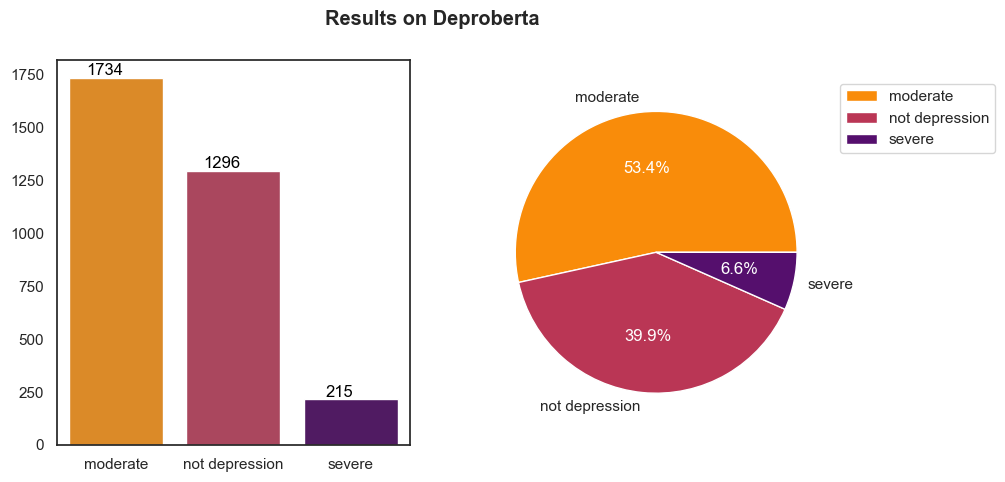

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x=df_deproberta['class_label'].value_counts().index
y=df_deproberta['class_label'].value_counts().values.tolist()
data = df_deproberta.groupby("class_label").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("inferno_r", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_deproberta['class_label'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Results on Deproberta',weight = 'bold')

### Comparison of original and the predicted calsses

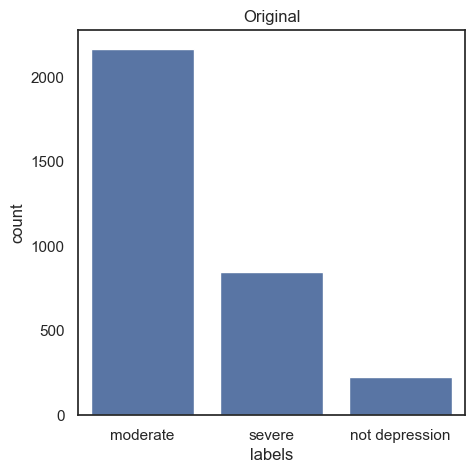

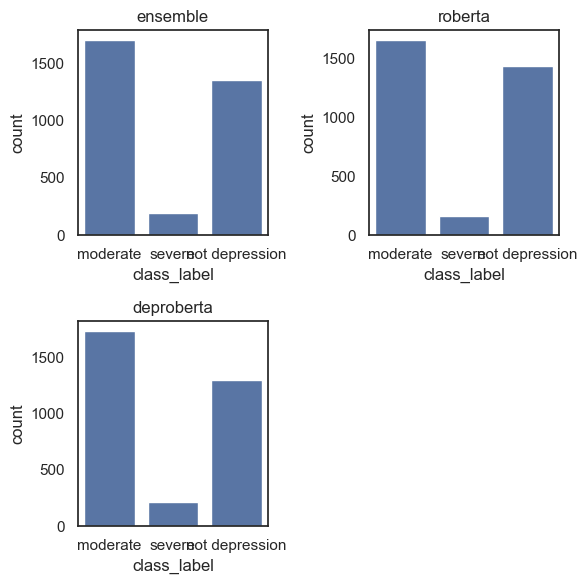

In [22]:
plt.figure(figsize=(5,5))
plt.subplot(111)
plt.title('Original')
sns.countplot(x=df_test['labels'])
plt.figure(figsize=(6,6))
plt.subplot(221)
plt.title('ensemble')
sns.countplot(x = df_ensemble['class_label'])
plt.subplot(222)
plt.title('roberta')
sns.countplot(x= df_roberta['class_label'])
plt.subplot(223)
plt.title('deproberta')
sns.countplot(x = df_deproberta['class_label'])
plt.tight_layout()

### Accuracy

In [23]:
y_true = df_test['labels']
pred_ensemble = df_ensemble['class_label']
pred_roberta = df_roberta['class_label']
pred_deproberta = df_deproberta['class_label']



------------Classification Report on Ensemble------------


                precision    recall  f1-score   support

      moderate       0.80      0.62      0.70      2169
not depression       0.02      0.10      0.03       228
        severe       0.08      0.02      0.03       848

      accuracy                           0.43      3245
     macro avg       0.30      0.25      0.25      3245
  weighted avg       0.55      0.43      0.48      3245



<Axes: >

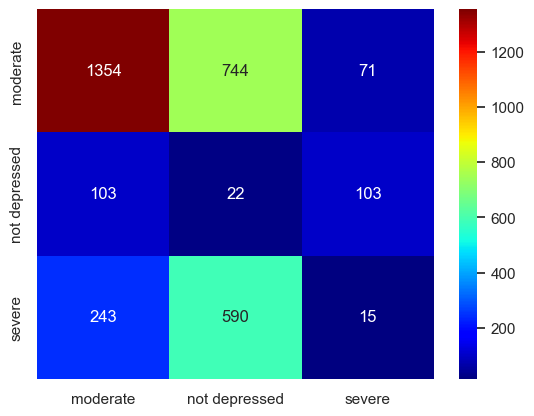

In [31]:
from sklearn.metrics import confusion_matrix
classes = ['moderate', 'not depressed', 'severe']
print('\n\n------------Classification Report on Ensemble------------\n\n')
print(classification_report(y_true, pred_ensemble))
sns.heatmap(confusion_matrix(y_true, pred_ensemble),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')



------------Classification Report on Roberta------------


                precision    recall  f1-score   support

      moderate       0.79      0.60      0.68      2169
not depression       0.01      0.09      0.02       228
        severe       0.08      0.02      0.03       848

      accuracy                           0.41      3245
     macro avg       0.29      0.23      0.24      3245
  weighted avg       0.55      0.41      0.46      3245



<Axes: >

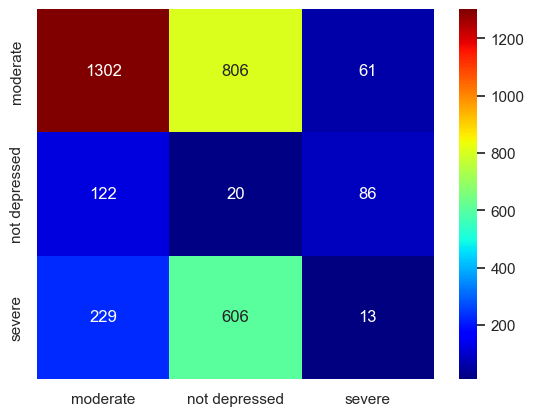

In [29]:
print('\n\n------------Classification Report on Roberta------------\n\n')
print(classification_report(y_true, pred_roberta))
sns.heatmap(confusion_matrix(y_true, pred_roberta),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')



------------Classification Report on De Roberta------------


                precision    recall  f1-score   support

      moderate       0.79      0.63      0.70      2169
not depression       0.02      0.10      0.03       228
        severe       0.09      0.02      0.04       848

      accuracy                           0.43      3245
     macro avg       0.30      0.25      0.25      3245
  weighted avg       0.55      0.43      0.48      3245



<Axes: >

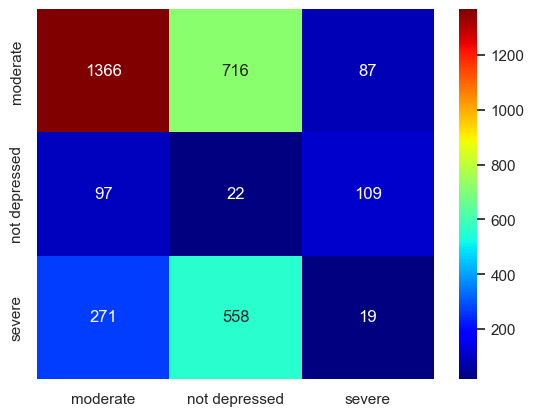

In [33]:
print('\n\n------------Classification Report on De Roberta------------\n\n')
print(classification_report(y_true, pred_deproberta))
sns.heatmap(confusion_matrix(y_true, pred_deproberta),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')